In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx #conda install networkx to do

In [2]:
df = pd.read_csv('wiki-RFA.csv').iloc[:,1:]
df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.
198272,Jiang,WhisperToMe,1,1,2003,NaN,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....


Handle inconsistent data

In [3]:
# Set Nan values
# replace field that's entirely space (or empty) with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# replace inconsistent date
df['Date'] = df['Date'].str.replace('Julu ', 'July ')
df['Date'] = df['Date'].str.replace('Janry ', 'January ')
df['Date'] = df['Date'].str.replace('Mya ', 'May ')
df['Date'] = df['Date'].str.replace('Jan ', 'January ')
df['Date'] = df['Date'].str.replace('Feb ', 'February ')
df['Date'] = df['Date'].str.replace('Mar ', 'March ')
df['Date'] = df['Date'].str.replace('Apr ', 'April ')
df['Date'] = df['Date'].str.replace('Jun ', 'June ')
df['Date'] = df['Date'].str.replace('Jul ', 'July ')
df['Date'] = df['Date'].str.replace('Aug ', 'August ')
df['Date'] = df['Date'].str.replace('Sep ', 'September ')
df['Date'] = df['Date'].str.replace('Oct ', 'October ')
df['Date'] = df['Date'].str.replace('Nov ', 'November ')
df['Date'] = df['Date'].str.replace('Dec ', 'December ')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%H:%M, %d %B %Y', errors='coerce')

df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


Influence graph for 2013

Seaborn
- how to customize network graph in python (https://zebrabi.com/guide/how-to-customize-network-graph-in-python-seaborn/)

NetworkX
- https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
- https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675

- Documentation: https://networkx.org/documentation/stable/reference/functions.html


Recherche: transform data into a network graph format python using seaborn


In [6]:
df_2013 = df[df['Year']==2013]
df_2013

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
3567,Tofutwitch11,Vacation9,0,-1,2013,2013-03-01 01:41:00,Answers to the questions leave something to be...
3568,Boing! said Zebedee,Vacation9,0,-1,2013,2013-03-01 03:54:00,'''Moral support''' for a future RfA run. I fe...
3569,BuickCenturyDriver,Vacation9,0,-1,2013,2013-03-01 05:13:00,"'''Moral Support''', per [[User:Boing! said Ze..."
3570,Retrolord,Vacation9,0,-1,2013,2013-03-01 10:11:00,"'''Neutral''', At this time, the candidate doe..."


2013 votes for the target BDD

In [13]:
df_2013_BDD = df_2013[df_2013['Target']=='BDD']

Text(0.5, 1.0, 'All 2013 votes for BDD')

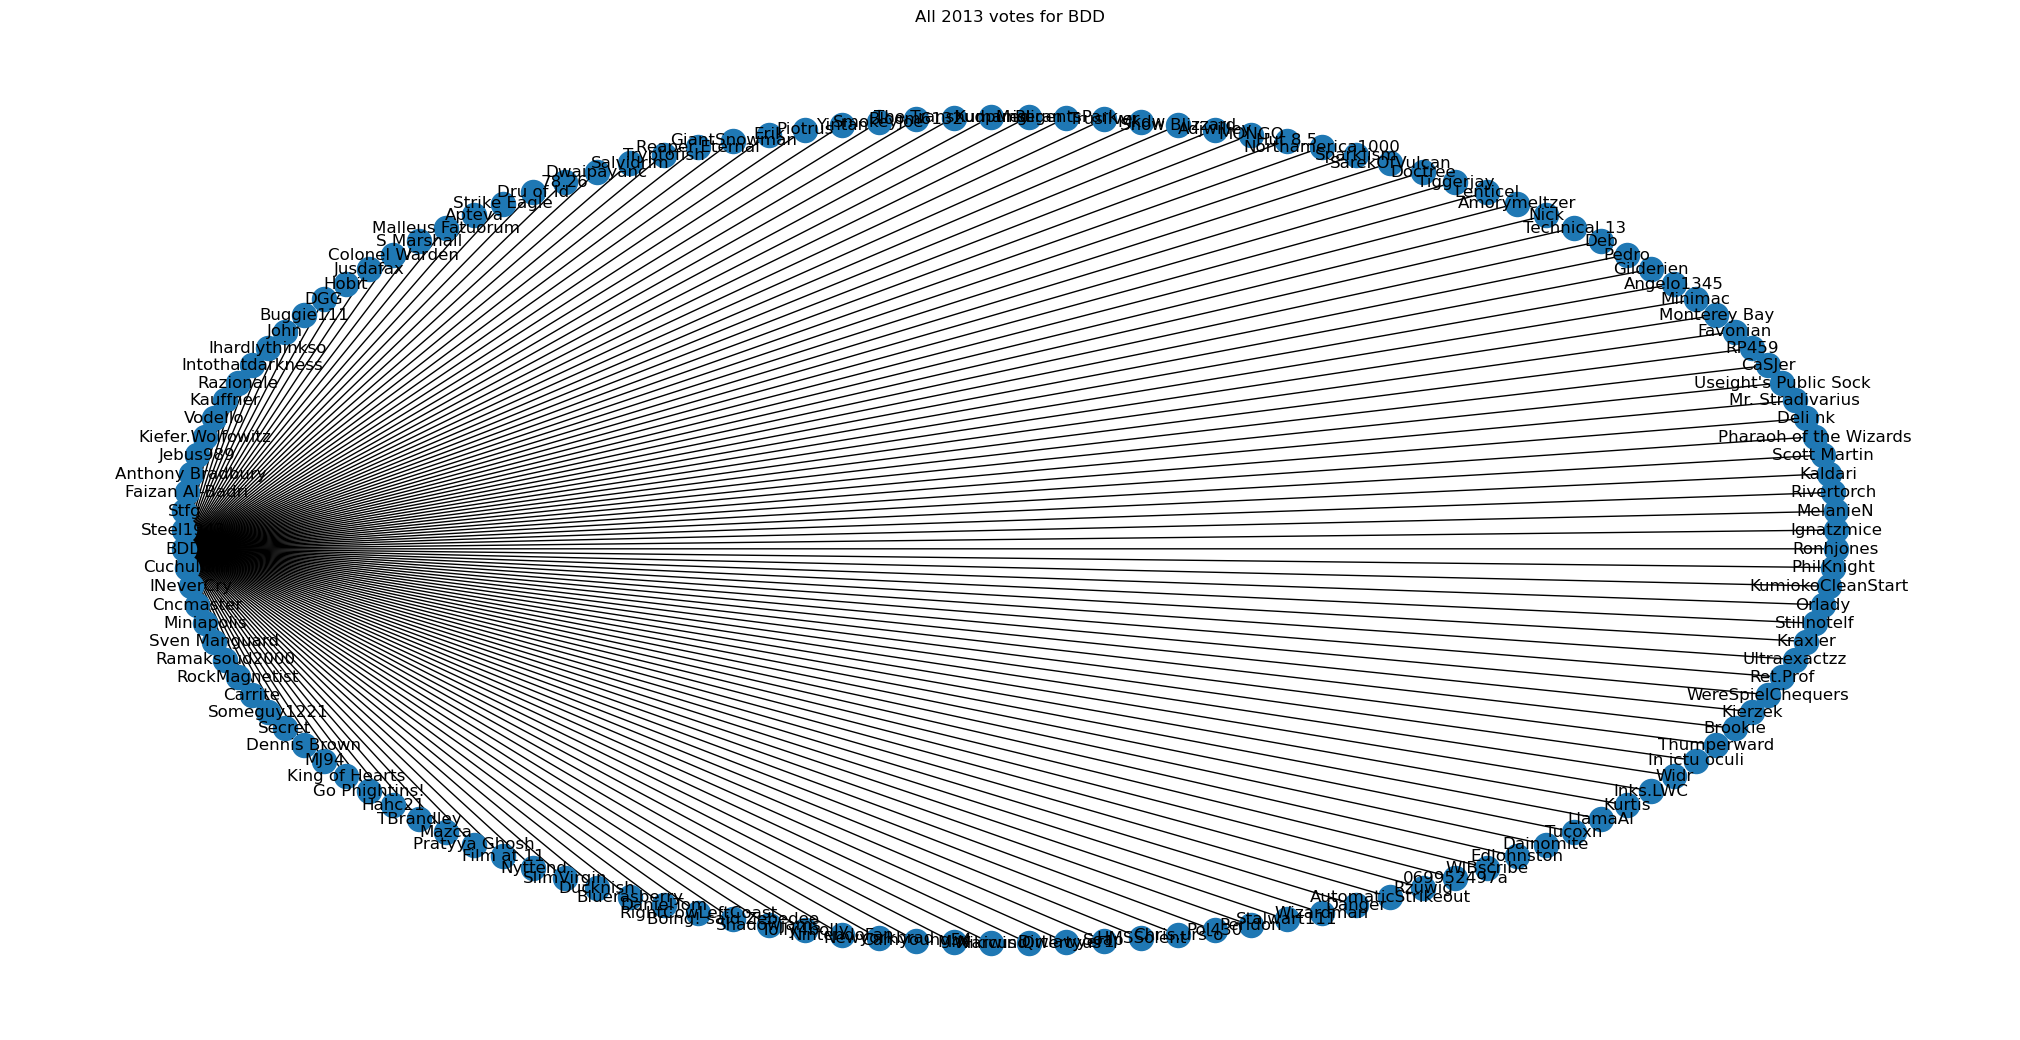

In [23]:
df_2013_source_BDD = df_2013_BDD[['Source', 'Target']]
G1=nx.Graph()
G1 = nx.from_pandas_edgelist(df_2013_source_BDD, 'Source', 'Target')
plt.figure(figsize=(20, 10))
nx.draw_shell(G1, with_labels=True)
plt.title('All 2013 votes for BDD')

In [19]:
df_2013_BDD_pos_vote = df_2013_BDD[df_2013_BDD['Vote']==1]
df_2013_BDD_neg_vote = df_2013_BDD[df_2013_BDD['Vote']==(-1)]
df_2013_BDD_neut_vote = df_2013_BDD[df_2013_BDD['Vote']==0]

Text(0.5, 1.0, 'Neutral vote for BDD')

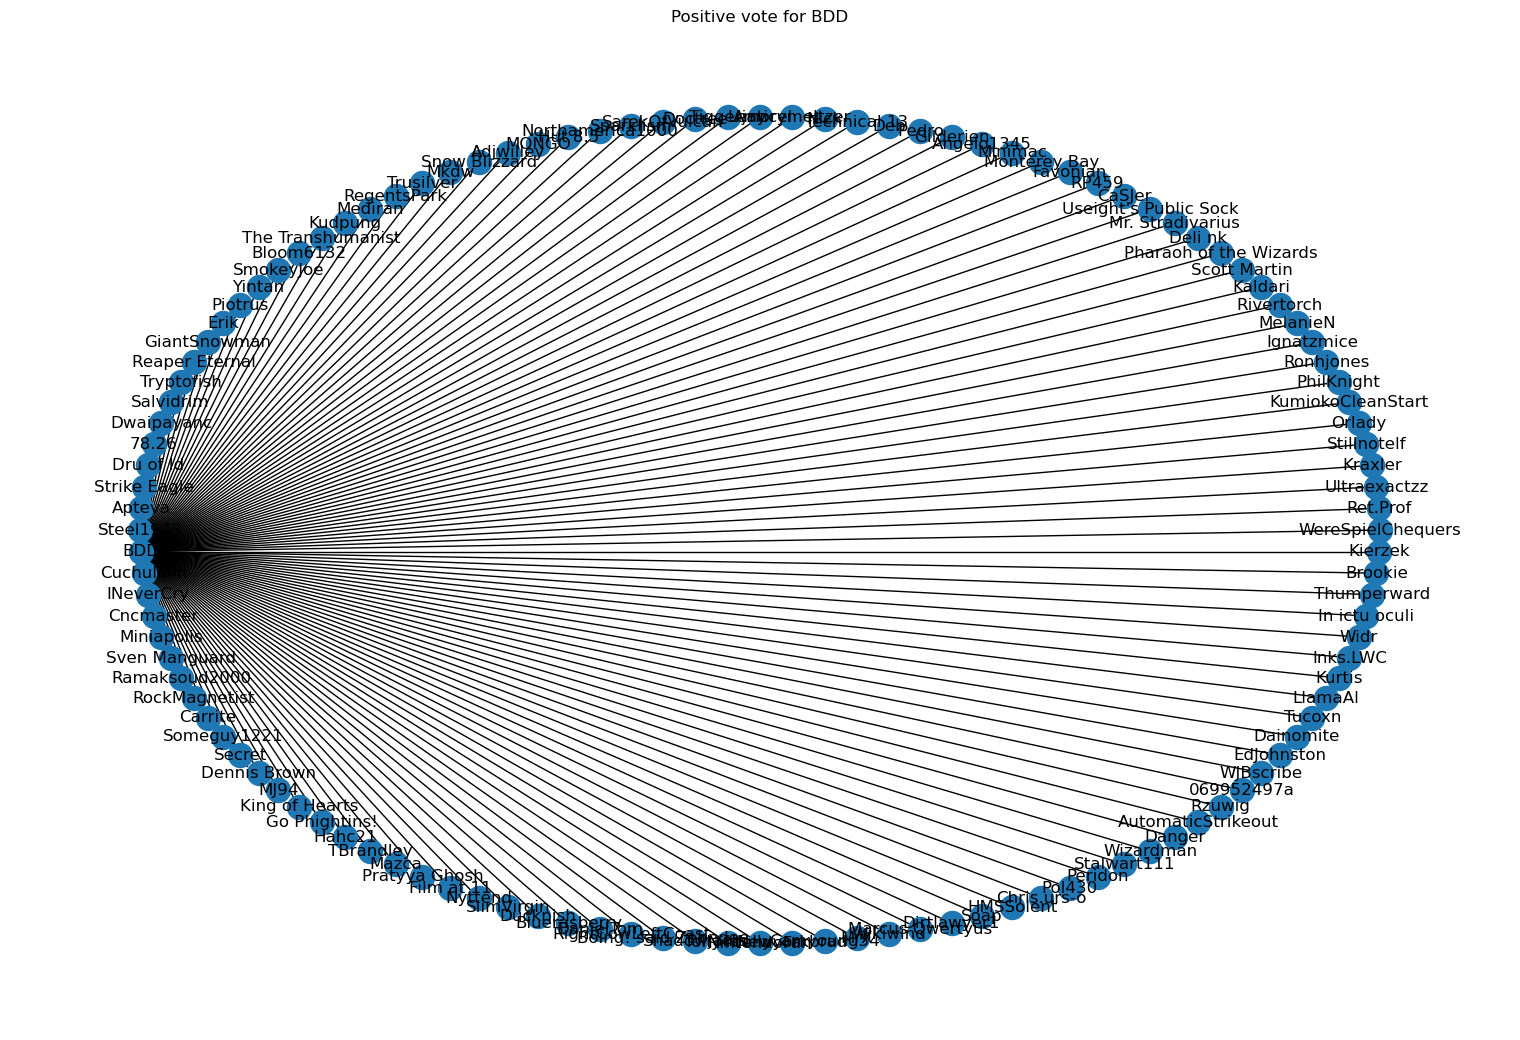

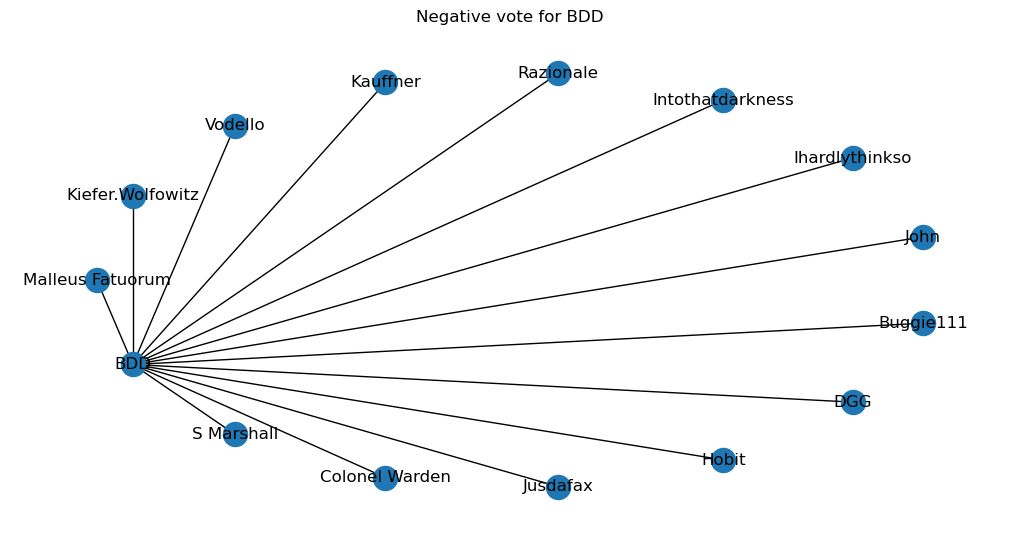

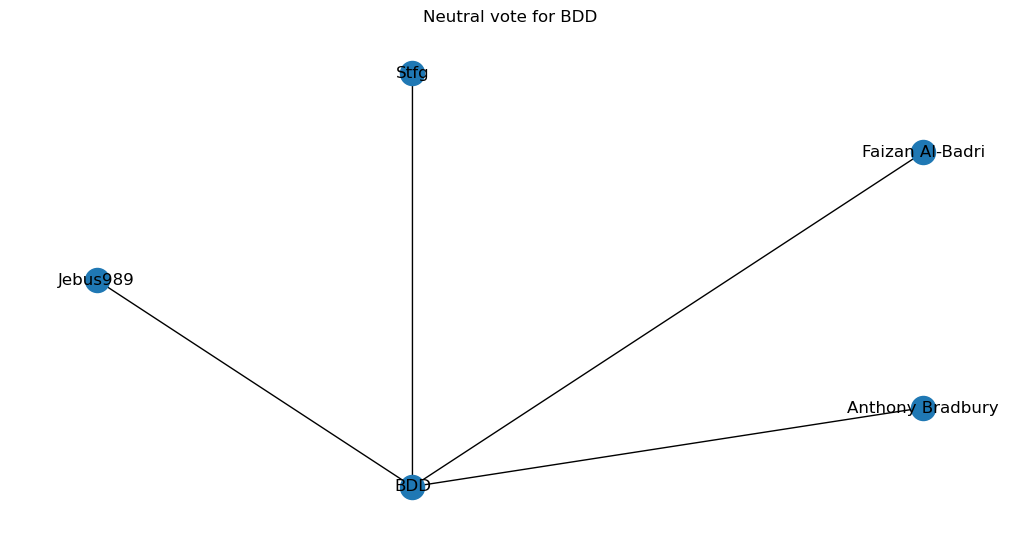

In [27]:
df_2013_BDD_pos_vote_ = df_2013_BDD_pos_vote[['Source', 'Target']]
G2=nx.Graph()
G2 = nx.from_pandas_edgelist(df_2013_BDD_pos_vote_, 'Source', 'Target')
plt.figure(figsize=(15, 10))
nx.draw_shell(G2, with_labels=True)
plt.title('Positive vote for BDD')

df_2013_BDD_neg_vote_ = df_2013_BDD_neg_vote[['Source', 'Target']]
G3=nx.Graph()
G3 = nx.from_pandas_edgelist(df_2013_BDD_neg_vote_, 'Source', 'Target')
plt.figure(figsize=(10, 5))
nx.draw_shell(G3, with_labels=True)
plt.title('Negative vote for BDD')

df_2013_BDD_neut_vote_ = df_2013_BDD_neut_vote[['Source', 'Target']]
G4=nx.Graph()
G4 = nx.from_pandas_edgelist(df_2013_BDD_neut_vote_, 'Source', 'Target')
plt.figure(figsize=(10, 5))
nx.draw_shell(G4, with_labels=True)
plt.title('Neutral vote for BDD')


For all votes of one year (2013), voting time average/median for each Source --> see if pattern appears

In [30]:
#compute voting time
voting_time = (df_2013.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')

# add voting time to df dataframe, merge on index
df_2013_voting_time = df_2013.join(voting_time.droplevel(0))
df_2013_voting_time

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667
...,...,...,...,...,...,...,...,...
3567,Tofutwitch11,Vacation9,0,-1,2013,2013-03-01 01:41:00,Answers to the questions leave something to be...,6.766667
3568,Boing! said Zebedee,Vacation9,0,-1,2013,2013-03-01 03:54:00,'''Moral support''' for a future RfA run. I fe...,8.983333
3569,BuickCenturyDriver,Vacation9,0,-1,2013,2013-03-01 05:13:00,"'''Moral Support''', per [[User:Boing! said Ze...",10.300000
3570,Retrolord,Vacation9,0,-1,2013,2013-03-01 10:11:00,"'''Neutral''', At this time, the candidate doe...",15.266667


In [36]:
# Remove targets where all voting times are NaN
df_2013_voting_time = df_2013_voting_time[~df_2013_voting_time['Voting_time'].isna()]

stat_voting_time_per_source = df_2013_voting_time.groupby('Source')['Voting_time'].agg(['mean', 'median'])
stat_voting_time_per_source

,mean,median
Source,,
069952497a,22.709524,17.733333
28bytes,55.416667,55.416667
5 albert square,79.575000,79.575000
7,126.833333,126.833333
78.26,130.750000,152.458333
...,...,...
nerdfighter,98.241667,98.241667
zeeyanketu,102.516667,102.516667
Érico Júnior Wouters,58.836667,40.766667


In [77]:
#sub select first and last voters
lim_first_voters=(stat_voting_time_per_source.values[:,0].max())*0.10
lim_last_voter=(stat_voting_time_per_source.values[:,0].max())*0.75
first_voters = stat_voting_time_per_source[stat_voting_time_per_source['mean']<lim_first_voters]
last_voters = stat_voting_time_per_source[stat_voting_time_per_source['mean']>lim_last_voter]
len(first_voters), len(last_voters)

(102, 41)

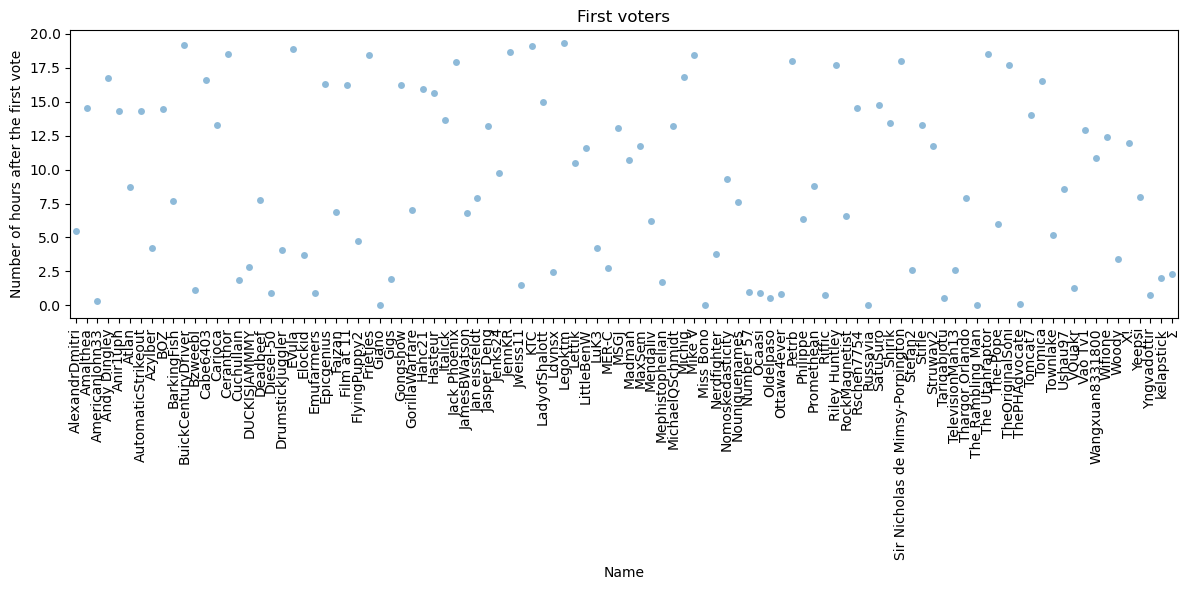

In [78]:
# Utiliser Seaborn pour créer un strip plot en utilisant des tableaux de données distincts pour x et y
plt.figure(figsize=(12, 6))
sns.stripplot(x=first_voters.index, y=first_voters.values[:,0], jitter=True, alpha=0.5)
plt.xticks(rotation=90)
plt.title("First voters")
plt.xlabel("Name")
plt.ylabel("Number of hours after the first vote")
plt.tight_layout()

# Afficher le graphique
plt.show()

Analysis of voting time for all years

In [80]:
voting_time = (df.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')

# add voting time to df dataframe, merge on index
df_timeserie = df.join(voting_time.droplevel(0))

# Remove targets where all voting times are NaN
df_timeserie = df_timeserie[~df_timeserie['Voting_time'].isna()]
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667
...,...,...,...,...,...,...,...,...
198267,Hephaestos,Ugen64,1,1,2003,2003-12-06 16:05:00,Also support; seems like a good contributor. -,0.000000
198269,Cyan,Vancouverguy,1,1,2003,2003-08-31 02:13:00,Support. --,0.000000
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,48.633333
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,0.000000


In [81]:
#mean and median voting time for all sources and for all years
stat_voting_time_per_year_per_source = df_timeserie.groupby(['Year', 'Source'])['Voting_time'].agg(['mean', 'median'])
stat_voting_time_per_year_per_source

mean        median
Year Source                                          
2003 172                      48.633333     48.633333
     Adam Bishop              14.575000      3.683333
     Alexandros              197.575000    197.575000
     Angela                   34.286364      0.350000
     Ark30inf                  1.979167      0.091667
...                                 ...           ...
2013 nerdfighter            2454.441667   2454.441667
     zeeyanketu             4814.916667   4814.916667
     Érico Júnior Wouters   1137.806667     40.766667
     Σ                     20956.000000  20956.000000
     とある白い猫                  163.600000    163.600000

[18137 rows x 2 columns]

In [101]:
stat_voting_time_per_year_per_source.index.get_level_values(0) #donne les valeurs de la colonne Year

Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
       ...
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
      dtype='int64', name='Year', length=18137)